[texto del enlace](https://)Ejecución en R en base a código de:
https://github.com/compsocialscience//summer-institute/blob/master/2022/materials/research-speed-dating/clustering_scripts.Rmd

In [7]:

# Install if it's your first time to run
install.packages("googlesheets4")
install.packages("janitor")
install.packages("naniar")
install.packages("tidyverse")
install.packages("vegan")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# Load
library(googlesheets4)
library(janitor)
library(naniar)
library(tidyverse)

Extracción de información de la plantilla compartida en Google Drive.

In [31]:

gs4_deauth()
#link to file
ss <- "https://docs.google.com/spreadsheets/d/1z3pOZeMhsGjocHPyGdfvmcsVhnYQllxkcX42sVNTPDk/edit?usp=sharing"
#organizers, change the sheet name to your specific site here:
dat <- read_sheet(ss, sheet = "Chile2023")
#clean variable names
dat <- clean_names(dat)
dat <- dat %>% filter(name != "SAMPLE STUDENT")
#select variables needed for group creation
dat <- dat %>% select(-c(email))
#replace NAs with 0s
dat <- dat %>% replace(is.na(.), 0)

#glimpse(dat)

✔ Reading from SICSS Chile Research Speed-Dating.

✔ Range ''Chile2023''.



Grupos por similitud de intereses en base un cluster jerárquico y visualización en dendograma.

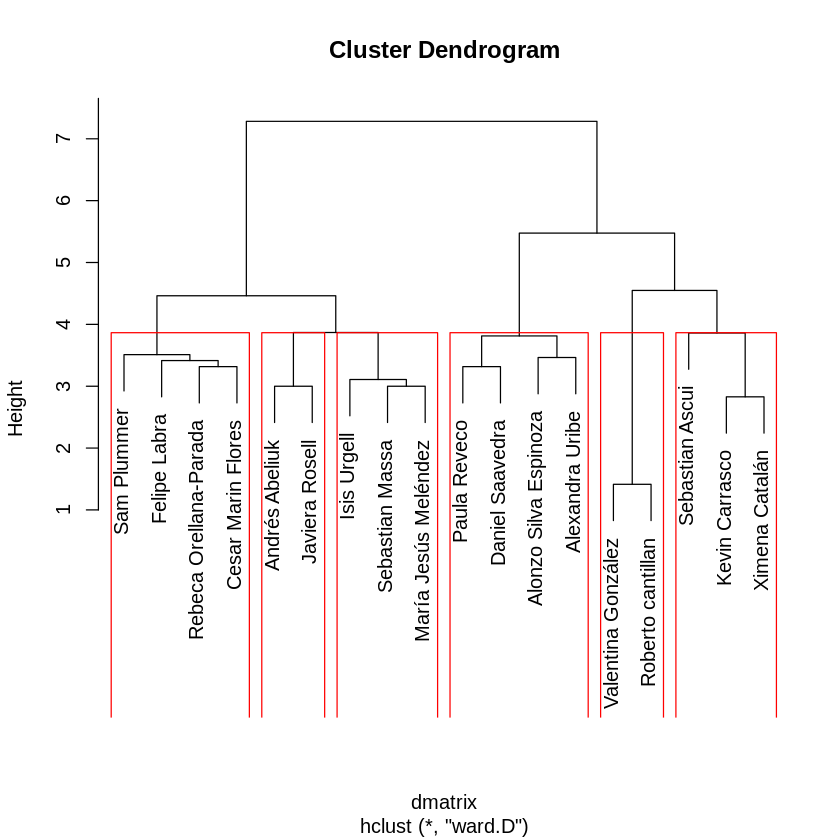

In [32]:
#create distance matrix
dat_mat <- as.matrix(dat)
rownames(dat_mat) <- dat$name
dat_mat <- dat_mat[,-1]
dmatrix <- dist(dat_mat, method = "euclidean")

#fit with the hierarchical clustering
fit <- hclust(dmatrix, method="ward.D")

# display dendogram
plot(fit)
groups <- cutree(fit, k=6) # cut tree into 5 clusters

# draw dendogram with cut points for groups
rect.hclust(fit, k=6, border="red")

Identifiación de grupos disimilares a través de la creación de un indicador de diversidad. Uso de Ecological Diversity Indices. Utiliza por default Shanon diversity index.

In [33]:
#identifying maximally dissimilar
final<-as.data.frame(NULL)
dat$names<-NULL
library(dplyr)
library(vegan)

for (i in 1:1000){
  test<-sample_n(dat, 4)
  names<-paste(test$name, collapse=",")
  diversity_score<-diversity(index="shannon", unlist(test[,c(2:ncol(test))]))
  data<-cbind(names, diversity_score)
  final<-rbind(final, data)
  if(1000 %% i == 0){
   print(i)
  }
}

[1] 1
[1] 2
[1] 4
[1] 5
[1] 8
[1] 10
[1] 20
[1] 25
[1] 40
[1] 50
[1] 100
[1] 125
[1] 200
[1] 250
[1] 500
[1] 1000


In [34]:
#organizers, people may be assigned to more than one group
#they should choose or you should assign them to one
final$diversity_score<-as.character(final$diversity_score)
final$diversity_score<-as.numeric(final$diversity_score)
final<-final[order(final$diversity_score, decreasing=TRUE),]
head(final, 10)


,names,diversity_score
,<chr>,<dbl>
45,"Felipe Labra,Javiera Rosell,Sam Plummer,Alexandra Uribe",4.317488
608,"Felipe Labra,Javiera Rosell,Alexandra Uribe,Sam Plummer",4.317488
906,"Sam Plummer,Javiera Rosell,Felipe Labra,Alexandra Uribe",4.317488
95,"Alexandra Uribe,Javiera Rosell,Ximena Catalán,Alonzo Silva Espinoza",4.290459
250,"Javiera Rosell,Ximena Catalán,Alexandra Uribe,Sam Plummer",4.290459
696,"Sam Plummer,Felipe Labra,Rebeca Orellana-Parada,Javiera Rosell",4.290459
296,"Felipe Labra,Alexandra Uribe,Javiera Rosell,Cesar Marin Flores",4.276666
549,"Felipe Labra,Alexandra Uribe,Cesar Marin Flores,Javiera Rosell",4.276666
757,"Andrés Abeliuk,Alexandra Uribe,Javiera Rosell,Felipe Labra",4.276666
